# Analyse Exploratoire du fichier myreport_sql_general_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pd.read_csv('../data/logServer/myreport_sql_general_full.csv',sep=',')

### Le fichier 241016_LogETL.csv : taille, colonnes

In [4]:
tab.shape

(2882, 12)

Il y a 171 489 lignes et 28 colonnes dans le dataframe. 

In [9]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Connexions utilisateur',
       'Connexions utilisateur(RAW)', 'Connexions/s', 'Connexions/s(RAW)',
       'Déconnexions/s', 'Déconnexions/s(RAW)', 'Temps mort',
       'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [11]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date et heure                2882 non-null   object 
 1   Date et heure(RAW)           2881 non-null   float64
 2   Connexions utilisateur       2195 non-null   object 
 3   Connexions utilisateur(RAW)  2194 non-null   float64
 4   Connexions/s                 1848 non-null   object 
 5   Connexions/s(RAW)            2194 non-null   float64
 6   Déconnexions/s               1849 non-null   object 
 7   Déconnexions/s(RAW)          2194 non-null   float64
 8   Temps mort                   2195 non-null   object 
 9   Temps mort(RAW)              2194 non-null   float64
 10  Couverture                   2882 non-null   object 
 11  Couverture(RAW)              2881 non-null   float64
dtypes: float64(6), object(6)
memory usage: 270.3+ KB


In [13]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                  2882
Date et heure(RAW)             2881
Connexions utilisateur           71
Connexions utilisateur(RAW)     103
Connexions/s                     77
Connexions/s(RAW)              1166
Déconnexions/s                   77
Déconnexions/s(RAW)            1173
Temps mort                        1
Temps mort(RAW)                   1
Couverture                        3
Couverture(RAW)                   2
dtype: int64


In [15]:
tab.head()

,Date et heure,Date et heure(RAW),Connexions utilisateur,Connexions utilisateur(RAW),Connexions/s,Connexions/s(RAW),Déconnexions/s,Déconnexions/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,"5,50 #",5.5,"0,04 #",0.0355,"0,04 #",0.0358,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,4 #,4.0,NaN,0.0070,NaN,0.0070,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,4 #,4.0,"0,05 #",0.0514,"0,05 #",0.0514,0 %,0.0,100 %,10000.0


### Suppression des valeurs NaN

In [20]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 1036


### Transformation des dates

In [23]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [25]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [27]:
tab.head()


,Date et heure,Date et heure(RAW),Connexions utilisateur,Connexions utilisateur(RAW),Connexions/s,Connexions/s(RAW),Déconnexions/s,Déconnexions/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW),date_full,date,heure
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,"5,50 #",5.5000,"0,04 #",0.0355,"0,04 #",0.0358,0 %,0.0,100 %,10000.0,2024-08-13 01:00:00,2024-08-13,01
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,4 #,4.0000,"0,05 #",0.0514,"0,05 #",0.0514,0 %,0.0,100 %,10000.0,2024-08-13 03:00:00,2024-08-13,03
5,13/08/2024 05:00:00 - 06:00:00,45517.166667,"3,50 #",3.5000,"0,22 #",0.2223,"0,22 #",0.2223,0 %,0.0,100 %,10000.0,2024-08-13 04:00:00,2024-08-13,04
6,13/08/2024 06:00:00 - 07:00:00,45517.208333,"5,17 #",5.1667,"0,29 #",0.2906,"0,29 #",0.2906,0 %,0.0,100 %,10000.0,2024-08-13 05:00:00,2024-08-13,05
7,13/08/2024 07:00:00 - 08:00:00,45517.250000,"4,50 #",4.5000,"0,26 #",0.2572,"0,26 #",0.2570,0 %,0.0,100 %,10000.0,2024-08-13 06:00:00,2024-08-13,06


### Réagencement et Suppression des colonnes

In [30]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [32]:
# renommage des colonnes
tab.rename(columns={"Connexions utilisateur(RAW)": "Connexions utilisateur(nb users)"}, inplace=True)
tab.rename(columns={"Connexions/s(RAW)": "Connexions/s(nb)"}, inplace=True)
tab.rename(columns={"Déconnexions/s(RAW)": "Déconnexions/s(nb)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture(%)"}, inplace=True)

In [34]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Connexions/s"])
tab = tab.drop(columns=["Déconnexions/s"])
tab = tab.drop(columns=["Connexions utilisateur"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

In [36]:
tab.head()

,date_full,date,heure,Date et heure(RAW),Connexions utilisateur(nb users),Connexions/s(nb),Déconnexions/s(nb),Temps mort(%),Couverture(%)
2,2024-08-13 01:00:00,2024-08-13,01,45517.041667,5.5000,0.0355,0.0358,0.0,10000.0
4,2024-08-13 03:00:00,2024-08-13,03,45517.125000,4.0000,0.0514,0.0514,0.0,10000.0
5,2024-08-13 04:00:00,2024-08-13,04,45517.166667,3.5000,0.2223,0.2223,0.0,10000.0
6,2024-08-13 05:00:00,2024-08-13,05,45517.208333,5.1667,0.2906,0.2906,0.0,10000.0
7,2024-08-13 06:00:00,2024-08-13,06,45517.250000,4.5000,0.2572,0.2570,0.0,10000.0


### Analyse temporelle

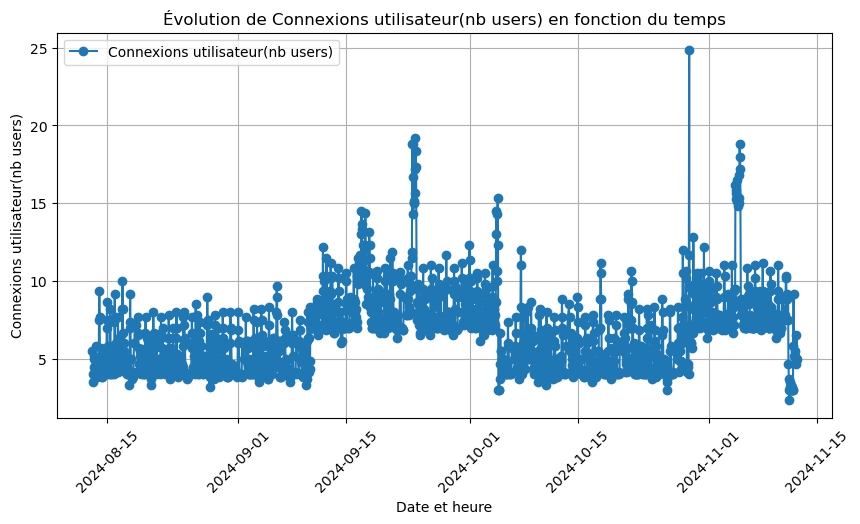

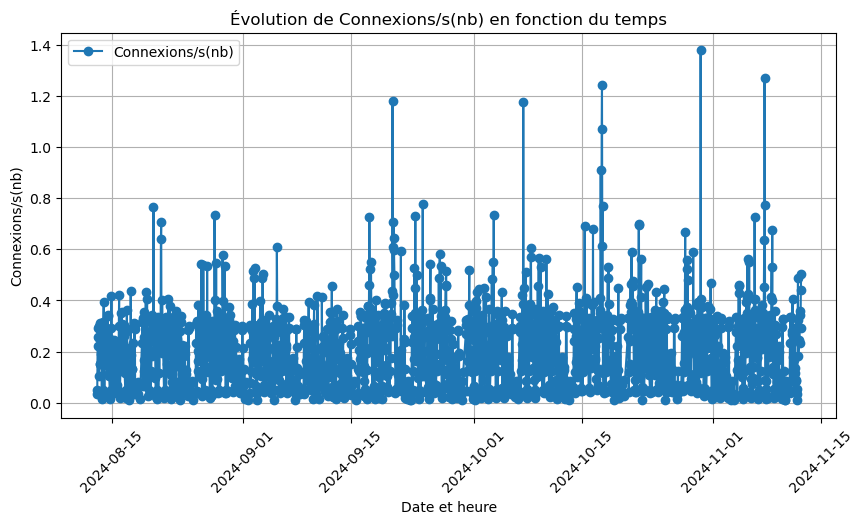

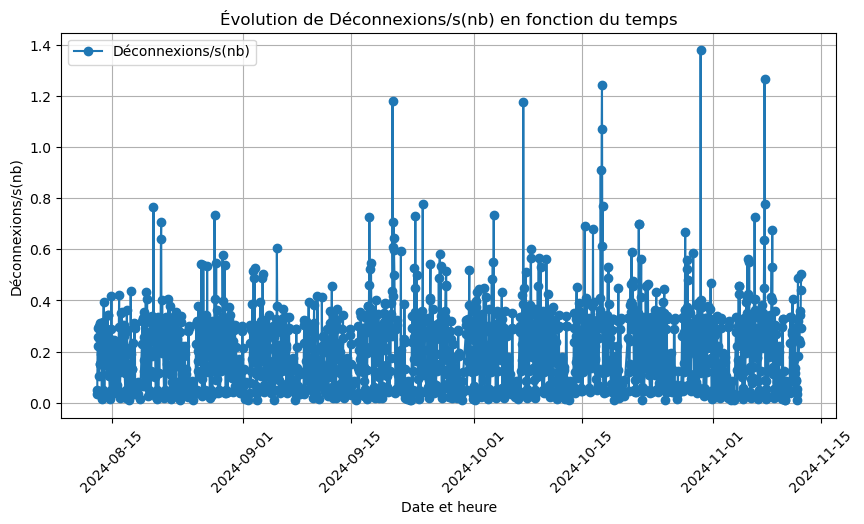

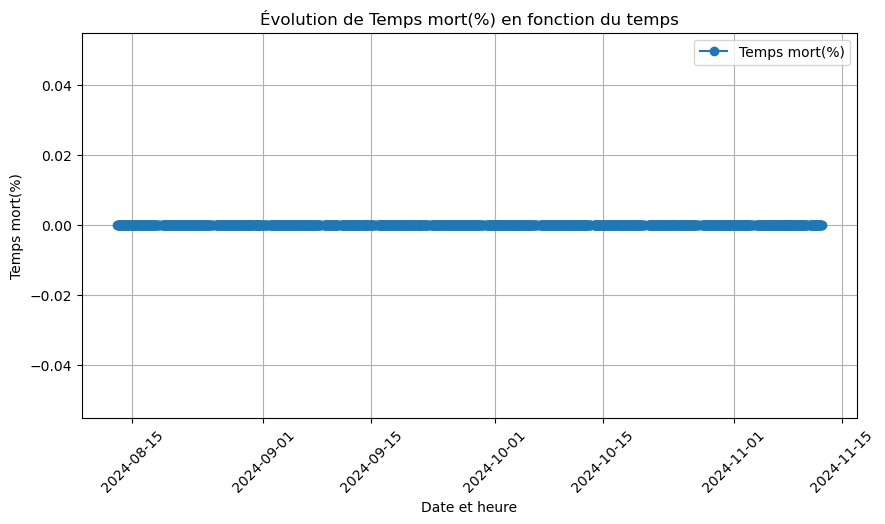

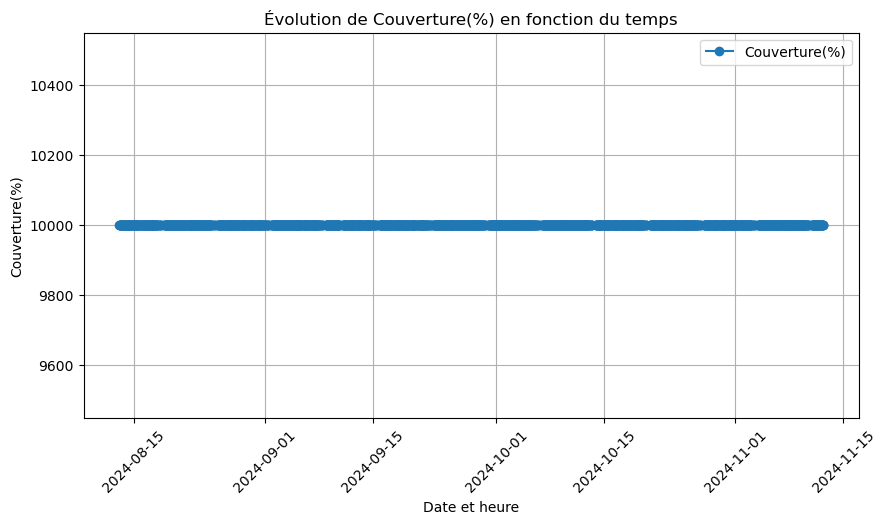

In [39]:
# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

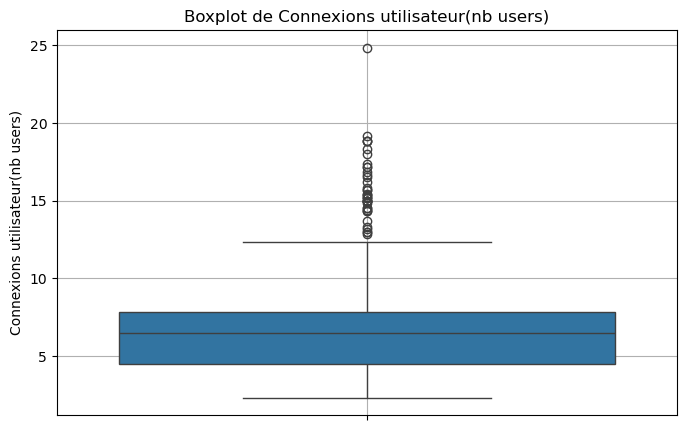

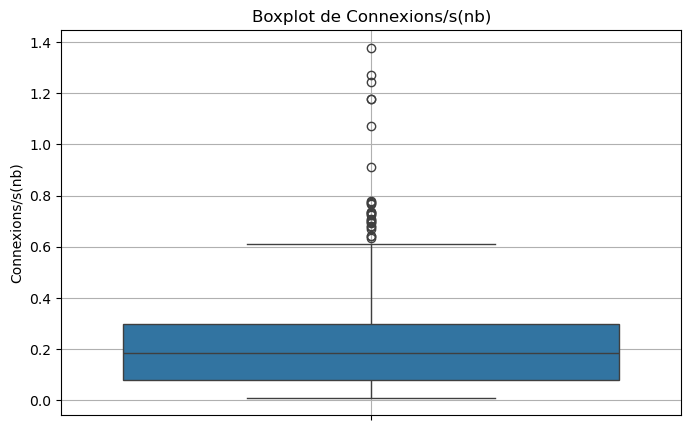

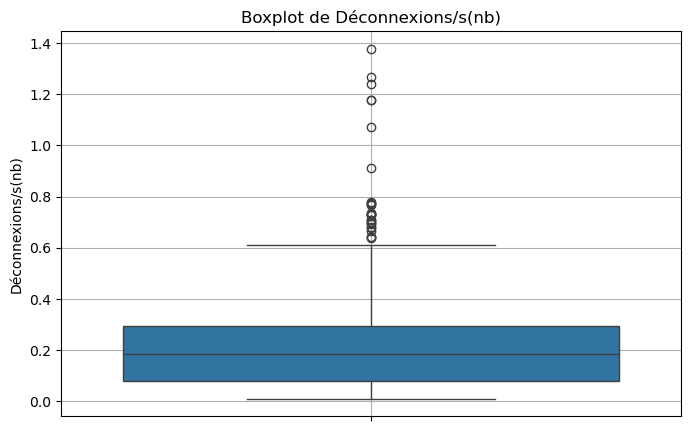

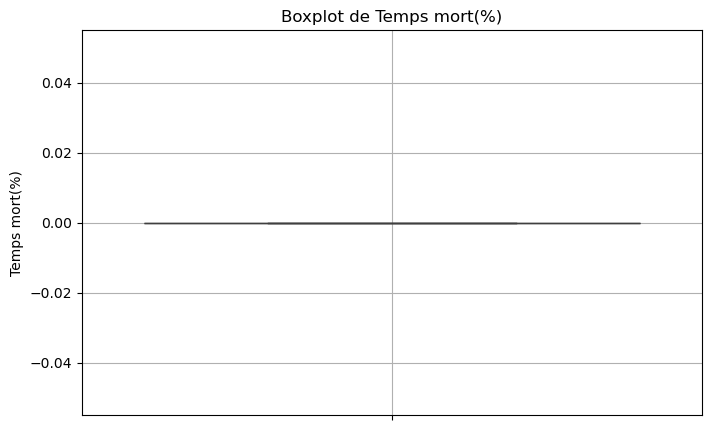

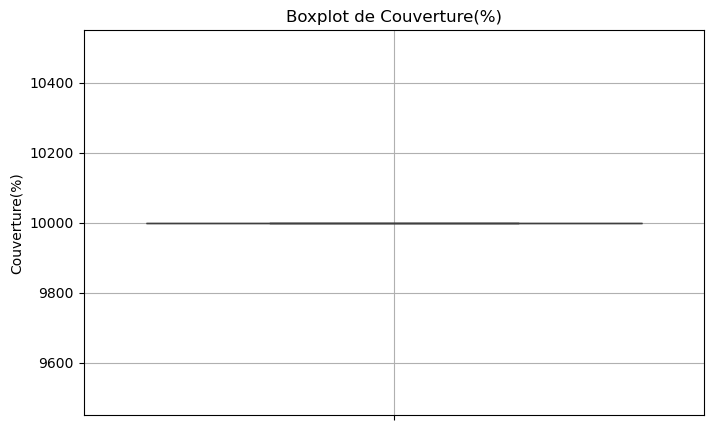

In [41]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

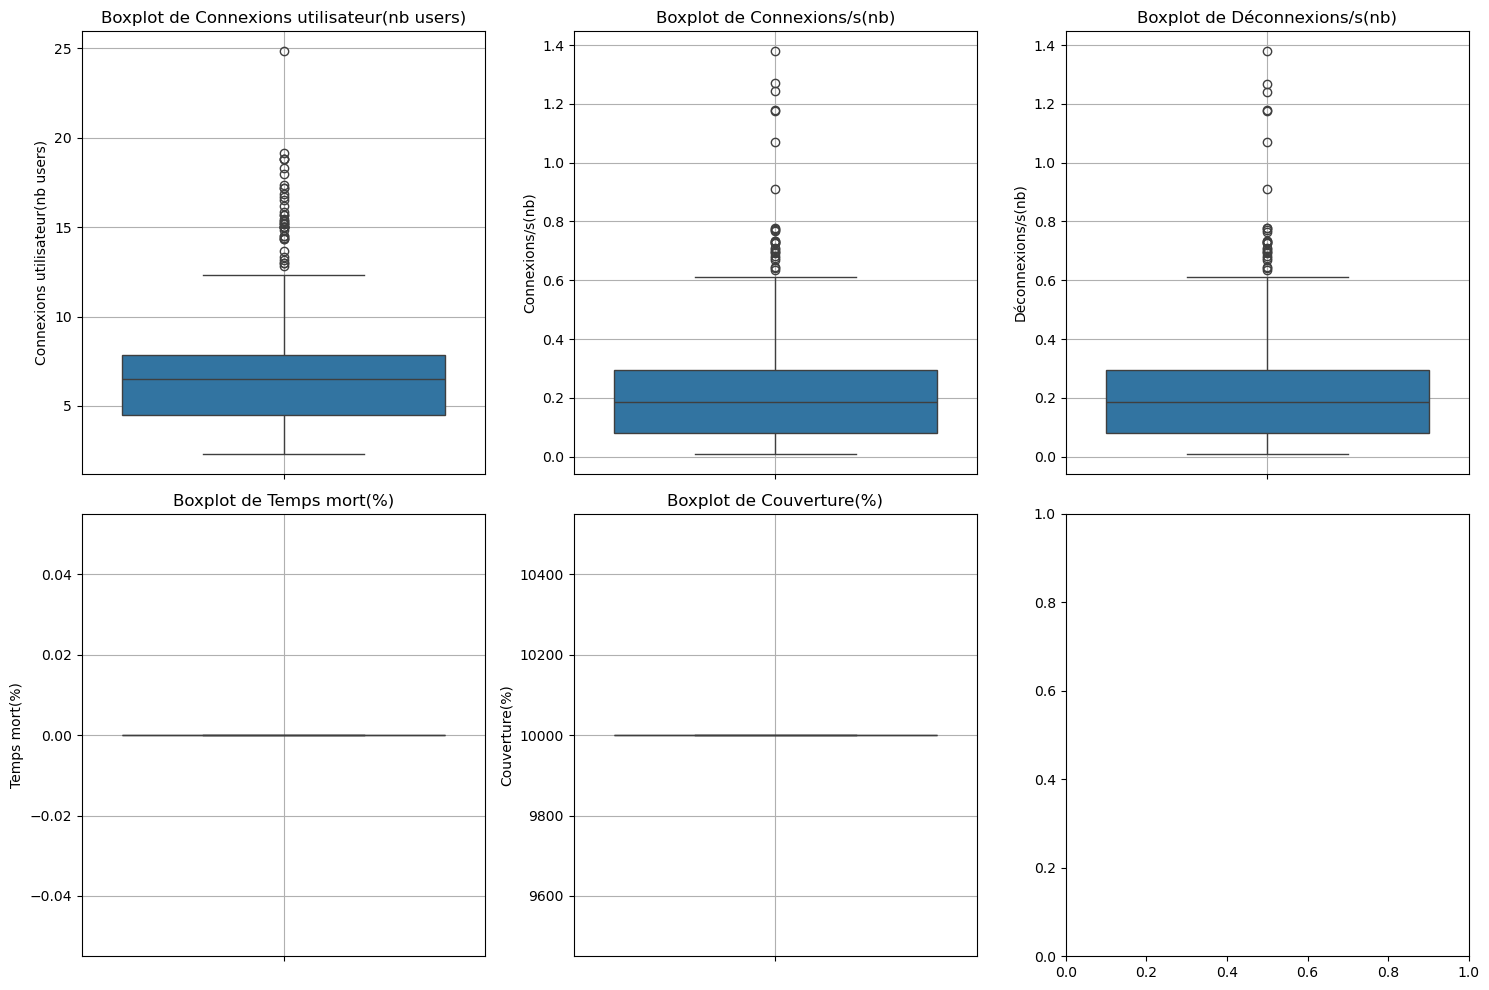

In [43]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### Enregistrement du nouveau dataframe dans un nouveau csv

In [46]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_general_filtered.csv", index=False, encoding='utf-8')

## Analyse temporelle

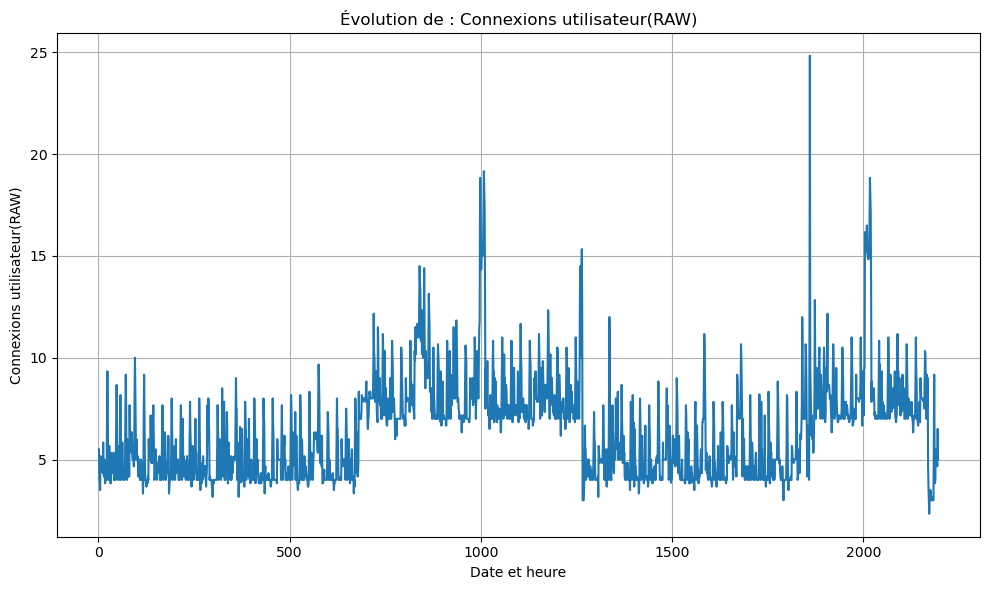

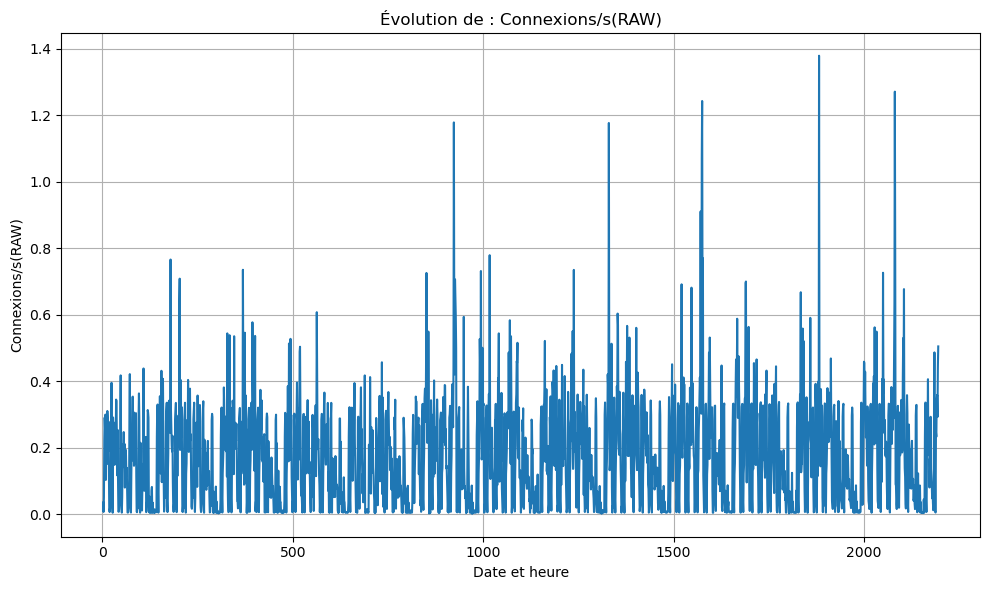

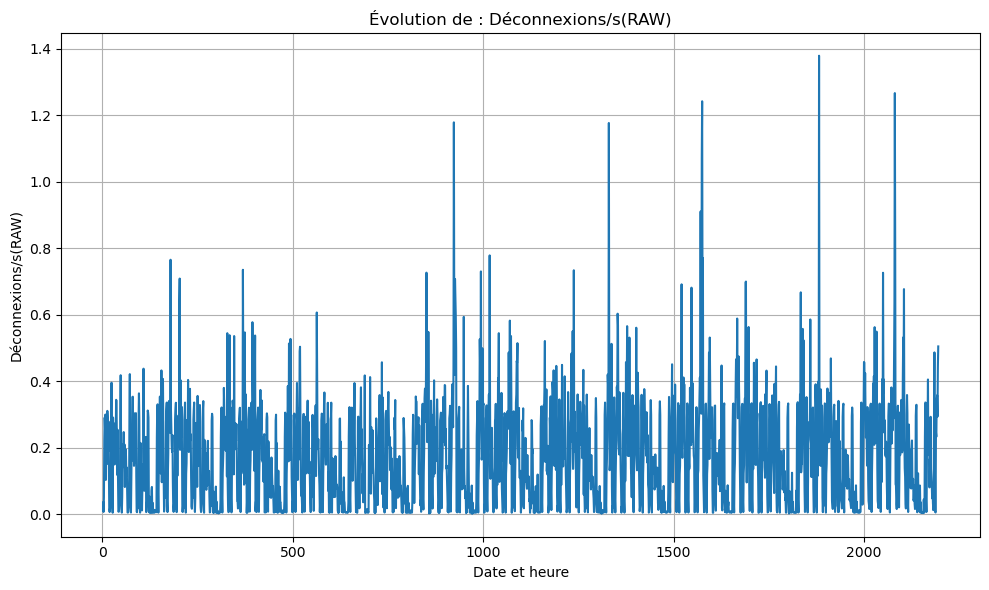

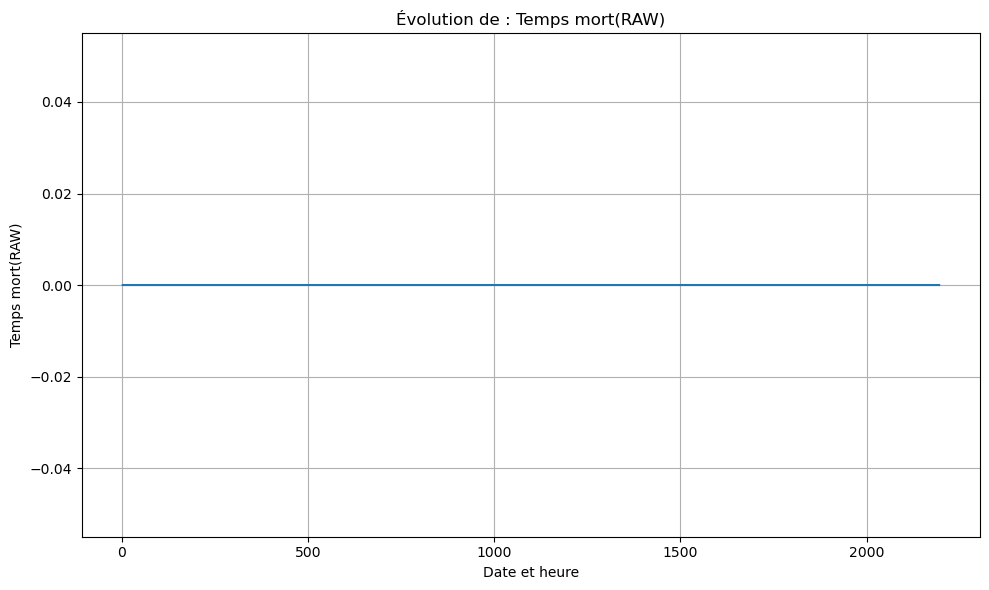

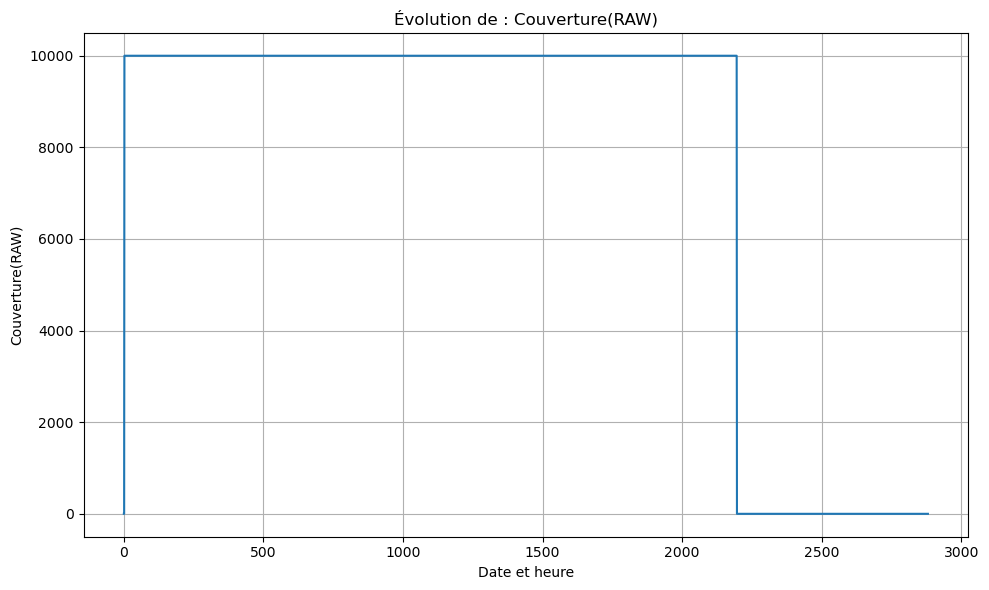

In [8]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()